# Non-Parametric Inference

First, we define a random variable $X = \frac{1}{3}\phi(x;0,1) + \frac{2}{3}\phi(x;1,1)$ where $\phi(x;\mu,\sigma^2) \sim \mathcal{N}(\mu, \sigma^2)$

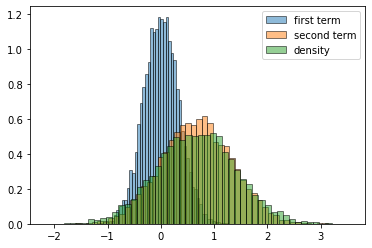

In [37]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import normal

# Get samples # CHECK
N = 10000
X_a = 1. / 3. * normal(loc=0., scale=1., size=N)
X_b = 2. / 3. * normal(loc=1., scale=1., size=N)
X = X_a + X_b

# Plot
BINS = 50
RANGE = (-3., 3.)
plt.hist(X_a, bins=BINS, density=True, edgecolor="black", alpha=0.5, label="first term")
plt.hist(X_b, bins=BINS, density=True, edgecolor="black", alpha=0.5, label="second term")
plt.hist(X, bins=BINS, density=True, edgecolor="black", alpha=0.5, label="density")
plt.legend(loc="upper right")
plt.show()

Now, we will estimate $p(x)$ using a histogram and KDE, then compare the KL-divergences:

In [36]:
from numpy import exp, expand_dims, histogram, linspace, pi, sqrt, squeeze
from scipy.stats import entropy, gaussian_kde

# Define our target density
def target_density (x):
    return (1. / 3.) * (1. / sqrt(2 * pi)) * exp(-0.5 * x * x) + (2. / 3.) * (1. / sqrt(2 * pi)) * exp(-0.5 * (x - 1) * (x - 1))

# Compute true density
sample_grid = expand_dims(linspace(*RANGE, BINS), axis=1)
true_density = squeeze(target_density(sample_grid))

# Estimate density using histogram
histogram_density, _ = histogram(X, BINS, range=RANGE, density=True)
histogram_density += 1e-6 # Smooth the histogram so that we can compute KL-div without blowing up
histogram_density /= histogram_density.sum()

# Estimate density using KDE
kde_density = gaussian_kde(X)(sample_grid.T)

# Now we compute the KL-div between them
histogram_div = entropy(true_density, histogram_density)
kde_div = entropy(true_density, kde_density)
print(f"Histogram KL divergence: {histogram_div}")
print(f"KDE KL divergence: {kde_div}")

Histogram KL divergence: 0.21315155842820865
KDE KL divergence: 0.23834709172097662


## Transformation
Let us find the density $$ Y = X^2 $$

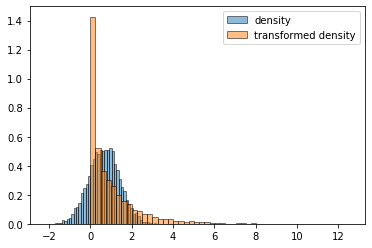

In [38]:
# Transform
Y = X ** 2

# Plot
plt.hist(X, bins=BINS, density=True, edgecolor="black", alpha=0.5, label="density")
plt.hist(Y, bins=BINS, density=True, edgecolor="black", alpha=0.5, label="transformed density")
plt.legend(loc="upper right")
plt.show()

## Bootstrapping


In [47]:
from numpy import array, std, zeros

# Define sampler
def sample_estimator (count=100):
    return normal(loc=1., scale=1., size=count)

# Compute sample variance directly
sample_means = array([sample_estimator().mean() for i in range(10)])
sample_variance = std(sample_means) ** 2
print(f"Estimator variance: {sample_variance}")

# Now compute with the bootstrap method
bootstrap_means = zeros(10,)
for i in range(bootstrap_means.shape[0]):
    samples = sample_estimator()
    sample_mean = samples.mean()
    bootstrap_means[i] = sample_mean

bootstrap_variance = std(bootstrap_means) ** 2
print(f"Bootstrap variance: {bootstrap_variance}")

Estimator variance: 0.006144636676478183
Bootstrap variance: 0.014585062127337378
